<html>
    <p style='background:#7B2B5D; color:#F79A23; font-size:20px; padding:10px;'><b>TP Smart Sensors : Apprentissage machine sur des données d’usinage
 </b></p>
</html>

<html>
    <p style='background:#FCDEB6; color:#7B2B5D; font-size:20px; padding:10px;'><b> Réalisé par : Mourad IZEM
        </b></p>
</html>

## PARTIE IV
Dans cette partie, nous allons essayer de prédire l'erreur de perçage (Partie I) en incrémentant le nombre de trous utilisé pour l'apprentissage et pour prédire la valeur suivante de l'erreur à chaque fois ! 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('data_capteurs.csv')
df= df.drop(['Unnamed: 0'],axis=1)
lst=[]
for i in range(1,169+1):
    lst.append(i)
df['nb_trous']=lst
df.head()

,P(x),P(y),D_In,D_In_max,D_In_min,D_Out,D_Out_max,D_Out_min,D_Cyl,D_Cyl_max,...,Max_F_T2&T3,Max_F_T3&T4,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Max_M_T1&T2,Max_M_T2&T3,Max_M_T3&T4,Et_Consommee,nb_trous
0,0,0,6361.101,6390.165,6337.091,6356.137,6379.951,6331.168,6360.885,6386.484880,...,60.192380,57.846468,0.039393,0.166414,0.224184,0.060992,0.265538,0.364416,203.421139,1
1,0,-14800,6360.422,6382.916,6336.803,6356.971,6385.830,6328.615,6361.655,6385.525948,...,68.722535,63.219992,0.042361,0.233616,0.338397,0.055130,0.404222,0.509717,311.625602,2
2,0,-29600,6361.120,6380.387,6342.378,6355.782,6368.560,6346.285,6361.503,6384.172075,...,74.660174,69.274525,0.044052,0.270518,0.380102,0.058972,0.471183,0.541733,346.459683,3
3,0,-44400,6361.548,6387.460,6335.587,6356.731,6374.355,6340.531,6362.440,6392.826233,...,80.390653,69.841536,0.046448,0.307440,0.406943,0.065431,0.506979,0.561767,365.956399,4
4,0,-59200,6361.723,6388.822,6333.843,6357.077,6380.657,6335.277,6362.719,6391.846588,...,86.261302,74.098430,0.048299,0.310324,0.421348,0.066481,0.517174,0.561583,385.516179,5


In [4]:
df['erreur'] = df['D_In']-6360
df['N'] = df['nb_trous']

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = []
for i in range (1,168,1):
    x = df['N'].head(i)
    x= x.values.reshape(-1,1)
    y = df['erreur'].head(i)
    mlp = MLPRegressor(hidden_layer_sizes =  (100,), activation = 'relu',alpha =  0.0005, solver= 'lbfgs',max_iter = 500)
    mlp.fit(x,y)
    y_p = mlp.predict(df['N'][i+1].reshape(-1,1))
    y_pred.append(y_p)

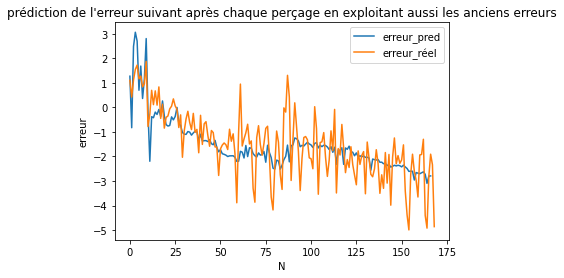

In [17]:
plt.plot (y_pred)
plt.plot(df['erreur'])
plt.title("prédiction de l'erreur suivant après chaque perçage en exploitant aussi les anciens erreurs")
plt.xlabel("N")
plt.ylabel("erreur")
plt.legend(['erreur_pred','erreur_réel'])

- Plus que l'outil s'use plus qu'on arrive pas à bien prédir les erreurs suivants !! 

## PARTIE V
La position du trou dans la plaque a-t-elle une influence dans les données, Comment pourrait-on vérier
cette information ?


- on peut la vérifier en vérifiant sa corrélation avec les autres donnée, ou l'utiliser pour prédire après la supprimer et voir si on va améliorer la prédiction ou non !

In [8]:
d = df.corr()
d['P(x)'].sort_values(ascending = False)

P(x)            1.000000
nb_trous        0.454846
N               0.454846
Ra_Cyl          0.449361
Max_F_T2&T3     0.434628
Moy_F_T2&T3     0.426627
Max_M_T1&T2     0.412028
Max_F_T1&T2     0.410403
Rz_Cyl          0.409920
Moy_M_T1&T2     0.398960
Max_F_T3&T4     0.398413
Moy_F_T1&T2     0.398088
Moy_M_T2&T3     0.390617
Ra_In           0.370059
Rq_Cyl          0.346336
Moy_F_T3&T4     0.335781
Max_M_T2&T3     0.318948
Rt_Cyl          0.308959
Rz_Cyl_max      0.302180
Et_Consommee    0.265120
Max_M_T3&T4     0.263897
Moy_M_T3&T4     0.205551
Rz_In           0.135635
Rq_In           0.109046
D_Out_min       0.056658
D_Cyl_max       0.001562
Rt_In          -0.008458
Rz_In_max      -0.022103
P(y)           -0.039003
D_In_max       -0.083840
Ra_Out         -0.126732
Rq_Out         -0.167371
Rz_Out         -0.191061
Rz_Out_max     -0.216616
Rt_Out         -0.216643
D_In_min       -0.220984
D_Cyl_min      -0.269054
D_Out          -0.290150
D_Out_max      -0.317829
D_In           -0.527527


- P(x) est corrélée avec le nb_trous et Ra_Cyl en premier lieu !

In [9]:
d = df.corr()
d['P(y)'].sort_values(ascending = False)

P(y)            1.000000
Rz_Out          0.055874
Rz_Out_max      0.052391
Rt_Out          0.051308
Rq_Out          0.051000
D_Out_max       0.047778
Ra_Out          0.045455
D_In_min        0.034484
Rt_In           0.032996
Rz_In_max       0.030240
Max_M_T3&T4     0.000750
Rq_In          -0.020064
Max_M_T2&T3    -0.025338
D_Cyl_max      -0.025830
Moy_M_T3&T4    -0.028352
Rz_In          -0.029169
Max_F_T1&T2    -0.032352
Rz_Cyl         -0.035464
Moy_F_T1&T2    -0.036050
Et_Consommee   -0.037734
P(x)           -0.039003
Moy_M_T2&T3    -0.041262
Max_F_T2&T3    -0.050707
Moy_F_T2&T3    -0.054281
D_Cyl_min      -0.059242
Moy_F_T3&T4    -0.059422
Max_F_T3&T4    -0.060509
Moy_M_T1&T2    -0.063027
Max_M_T1&T2    -0.064856
Rz_Cyl_max     -0.068729
Rt_Cyl         -0.070861
nb_trous       -0.070947
N              -0.070947
Ra_Cyl         -0.073037
Rq_Cyl         -0.073509
D_Out_min      -0.081088
D_Out          -0.086935
D_In           -0.107402
erreur         -0.107402
Ra_In          -0.117160


- P(y) est corrélée avec les rugosités Rz_Out, Rz_Out_max et Rt_Out en premier lieu !